<a href="https://colab.research.google.com/github/wanderson42/Portfolio-DS/blob/main/Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Science - Turing USP** 

# **Projeto de Portfólio Nº 1:** 

<span style='color:Gray'>  Aplicando técnicas de Feature Engineering em um dataset não tratado sobre Bike-sharing </span>

Previsão de demanda de compartilhamento de bicicletas. 


Autor: Wanderson Ferreira

## 1. Introdução: Algumas informações sobre o Dataset

</div>
<center><img src="https://i0.wp.com/jornal.usp.br/wp-content/uploads/2020/03/Bicicletas-Compartilhadas_Foto-Marcos-Santos_U0Y9987-1-scaled.jpg?resize=1024%2C683&ssl=1" width="700"/> <center>
</div>

<p><center>Imagem meramente ilustrativa</center></p>


Os sistemas de compartilhamento de bicicletas são um meio de aluguel de bicicletas em que o processo de obtenção de adesão, aluguel e devolução de bicicletas é automatizado por meio de uma rede de postos de retirada em toda a cidade. Usando esses sistemas, as pessoas podem alugar uma bicicleta em um local e devolvê-la em um local diferente conforme necessário. Atualmente, existem mais de 500 programas de compartilhamento de bicicletas em todo o mundo.

Os dados gerados por esses sistemas são bem atrativos para a comunidade de dados porque a duração da viagem, local de partida, local de chegada e tempo decorrido são registrados explicitamente. Os sistemas de compartilhamento de bicicletas funcionam, portanto, como uma rede de sensores, que pode ser usada para estudar a mobilidade urbana em uma cidade.

**Descrição do dataset:**


> - **season:** Identificador de 1 a 4 que representam as estações do ano, em ordem - 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall;
>
> - **weather:** Identificador de 1 a 4 que representam quatro diferentes condições climáticas, em ordem - 1 = clear ou cloudy, 2 = Mists, 3 = Light rain ou snow, 4 = Heavy rain, snow ou clima ainda pior;
>
> - **temp:** Indicador de temperatura;
>
> - **atemp:** Indicador de sensação térmica;
>
> - **humidity:** Indicador de umidade numa escala de 1 a 100;
>
> - **windspeed:** Indicador de velocidade do vento, em mph (milhas por hora);
>
> - **holiday:** Contem expressões booleanas que classificam se o dia em questão é feriado ou não;
>
> - **workingday:** Contem expressões booleanas que classificam se o dia em questão é dia útil ou não;
>
> - **datetime:** Data + horario do aluguel da bicicleta (formato timestamp);
>
> - **casual:** Registro do número de aluguéis de usuários que não são registrados;
>
> - **registered:** Registro do número de aluguéis de usuários que são registrados;
>
> - **count:** Registro do número total de aluguéis por hora.

## 2. Importando Bibliotecas de Data Science

In [16]:
import pandas as pd
import numpy as np

## 3. Carregando o dataset 


In [17]:
#Dataset
url = 'https://raw.githubusercontent.com/wanderson42/Portfolio-DS/main/datasets/bike-sharing.csv'
df = pd.read_csv(url)

 Como parte da investigação inicial, segue abaixo uma rápida ánalise explotória dos dados (EDA - Exploratory Data Analysis), para melhor definirmos quais técnicas de Feature Engineering serão mais adequadas.

## 4. EDA

**4.1 Noção gerão da estrutura do dataset**

In [18]:
#Primeiras impressões sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


O dataset é composto por 10886 instâncias (linhas) e 12 features (colunas).


In [19]:
# Obtendo-se uma amostra do dataset 
df.sample(n = 8).style.background_gradient(cmap = 'Set3')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10046,2012-11-03 23:00:00,4,0,0,1,13.120000,16.665000,57,7.001500,15,133,148
10135,2012-11-07 16:00:00,4,0,1,2,13.120000,14.395000,53,23.999400,23,250,273
2459,2011-06-10 09:00:00,2,0,1,1,31.160000,34.850000,55,0.000000,37,176,213
1330,2011-04-01 07:00:00,2,0,1,3,9.840000,12.120000,93,0.000000,4,91,95
8908,2012-08-13 13:00:00,3,0,1,1,31.980000,34.850000,40,11.001400,79,175,254
5144,2011-12-08 10:00:00,4,0,1,1,10.660000,11.365000,52,22.002800,1,109,110
3266,2011-08-06 00:00:00,3,0,0,1,27.060000,30.305000,78,12.998000,29,104,133
5188,2011-12-10 06:00:00,4,0,0,1,9.840000,12.880000,65,7.001500,1,10,11


Das informações acima podemos inferir que:

> - A feature `datetime` tida como objeto contem informações sobre data e hora e poderiamos transforma-la em novas features.
>
> - As features `season`, `holiday`, `workingday` e `weather` são mostrados como números inteiros, mas na verdade são variáveis ​​categóricas, então teremos que convertê-los para o formato adequado.
>
> - Além destas, todas as demais features são de natureza numérica.
>




**4.2 Verificando a existência de valores ausentes (NaN)**

In [20]:
def f1():
  # Calculando o valor total de Nan values no dataset de treino
  df_total_nan = df.isnull().sum()
  df_percent_nan = ((df.isnull().sum()/df.shape[0])*100).round(2)

  # Construindo uma tabela de missing values 
  table_missing_data = pd.concat([df_total_nan,df_percent_nan],
                                axis=1, 
                                keys=['Total NaN', 'Total NaN(%)'],
                                sort = True)
  # lets check the head
  return table_missing_data.style.bar(color = 'gold')

f1()

,Total NaN,Total NaN(%)
atemp,0,0.000000
casual,0,0.000000
count,0,0.000000
datetime,0,0.000000
holiday,0,0.000000
humidity,0,0.000000
registered,0,0.000000
season,0,0.000000
temp,0,0.000000
weather,0,0.000000


Felizmente o dataset não contém valores ausentes que é um dos tipos de problemas mais comuns em um dataset

**4.3 Verificando a existência de outliers: Usando pandas describe()**

Ao obtermos uma estatistica descritiva do dataset, conforme a tabela abaixo, podemos investigar a existência de ouliers, que são valores que destoam da maioria. 

In [21]:
#Obtendo-se um resumo estatistico conciso do dataset
df.describe().style.background_gradient(cmap = 'Set3')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Usando a função describe() geramos um conjunto de estatísticas descritivas que nos ajudar a determinar se o conjunto de dados tem ou não valores discrepantes.
Uma vez que a média é sensível aos outliers, por exemplo na feature temp  que denota a temperatura o valor médio não é tão discrepante do valor máximo, da mesma forma que o valor mínimo. Então podemos dizer que a feature temp não deve possui outliers e no geral as demais features apresentam esse mesmo padrão de seguir o comportamento de uma distribuição normal. 


## 5. Feature Engineering

Uma vez que aplicamos a EDA, agora podemos dar um passo à frente aplicando técnicas de feature engineering conforme o necessário.

**5.1 Feature Splitting: Criando novas Features**

Aqui irei criar quatro novas features a partir de `datetime` para melhorar o poder de previsão do modelo. Inicialmente, geramos novas variáveis ​​como hora, mês, dia e ano.

In [22]:
#Convertendo objeto para o formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year # Atribudo do pandas que extrai o ano para a coluna year 
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour


**5.2 Feature Transformation: Variáveis categóricas**

Conforme observado na EDA vamos fazer a conversão de features numéricas para categóricas, o intuito dessa conversão é para fazer uma EDA mais elaborada para gerar informações de valor por meio de bibliotecas de visualização de dados como o Plotly e/ou Bokeh.
 
Aqui ao estilo “from scratch” eu criei dicionários e com a função `map` eu fui atribuindo valores categóricos a todos os items das features em questão 


In [23]:
df['holiday'] = df['holiday'].map({0: 'no', 1 : 'yes' })
df['workingday'] = df['workingday'].map({0: 'no', 1 : 'yes' })
df['season'] = df['season'].map({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 :'Winter' })
df['weather'] = df['weather'].map({1: 'Clear', \
                                         2: 'Mist', \
                                         3: 'Light Snow', \
                                         4: 'Heavy Snow'})

# Astype to category
categorical_features = ['season', 'holiday', 'workingday', 'weather']

for feature in categorical_features:
    df[feature] = df[feature].astype("category")
# Obtendo-se uma amostra do dataset 
df.sample(n = 6).style.background_gradient(cmap = 'Set3')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
8386,2012-07-10 19:00:00,Fall,no,yes,Light Snow,28.700000,33.335000,74,15.001300,55,359,414,2012,7,10,19
2074,2011-05-13 08:00:00,Summer,no,yes,Mist,20.500000,24.240000,88,12.998000,26,361,387,2011,5,13,8
8154,2012-07-01 03:00:00,Fall,no,no,Clear,29.520000,35.605000,84,8.998100,6,27,33,2012,7,1,3
7882,2012-06-08 19:00:00,Summer,no,yes,Clear,30.340000,32.575000,30,15.001300,95,460,555,2012,6,8,19
3311,2011-08-07 21:00:00,Fall,no,no,Clear,29.520000,35.605000,84,7.001500,36,100,136,2011,8,7,21
4069,2011-10-01 14:00:00,Winter,no,no,Mist,17.220000,21.210000,71,23.999400,33,147,180,2011,10,1,14




**5.3 One-hot encoding (by get_dummies)**


Considerando que um modelo de aprendizado de máquina exige que todos os valores sejam numéricos. Eu fiz a codificação One Hot para uma gama de features representando elas de forma binária. Aqui eu fiz essa codificação de rótulo por meio da função get_dummies onde para cada tipo de dado rotulado de uma feature ele cria uma nova feature que são conhecidas como variáveis “Dummy”. 
Por exemplo, na feature `hour` ao ser codificada pela função get_dummies ela gera novas features onde cada uma é representada por zeros e 1. E assim a gente pode gerar previsões da demanda de bikes em função das horas do dia, por exemplo. 


In [24]:
# One hot encoding 
season = pd.get_dummies(df['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(df['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(df['holiday'],prefix='holiday',drop_first=True)
workingday = pd.get_dummies(df['workingday'],prefix='workingday',drop_first=True)
year = pd.get_dummies(df['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df['month'],prefix='month',drop_first=True)
day = pd.get_dummies(df['day'],prefix='day',drop_first=True)
hour = pd.get_dummies(df['hour'],prefix='hour',drop_first=True)

df.drop(['datetime','season','weather','holiday','workingday', 'year', 'month', 'day','hour'], axis=1,inplace=True)
df = pd.concat([df,season,weather,holiday,year, month,hour],axis=1)

# Obtendo-se uma amostra do dataset 
df.sample(n = 8).style.background_gradient(cmap = 'Set3')

,temp,atemp,humidity,windspeed,casual,registered,count,season_Spring,season_Summer,season_Winter,weather_Heavy Snow,weather_Light Snow,weather_Mist,holiday_yes,year_2012,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
9323,23.780000,27.275000,56,8.998100,40,421,461,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4328,22.140000,25.760000,88,30.002600,14,183,197,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8103,22.960000,26.515000,73,16.997900,12,28,40,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3121,30.340000,34.850000,66,11.001400,32,59,91,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26,17.220000,21.210000,100,19.001200,1,8,9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,13.120000,14.395000,57,27.999300,4,108,112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4677,14.760000,18.180000,87,6.003200,1,47,48,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
956,6.560000,9.090000,80,8.998100,0,83,83,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**5.4 Scaling: Standardization**

Uma vez que o meu dataset é constituído por dados que seguem o comportamento de uma distribuição normal achei interessante aplicar uma padronização nas variaveis preditoras (i.e. exceto a target) por meio da função StandarScale(), Já pensando na construção de modelos de aprendizado de máquina onde eu posso garantir que todas as features com escalas discrepantes entre si possam ser bem relacionadas. 
 
O resultado disso é um array cuja a média foi subtraída e dividiu-se todos os valores pelo desvio padrão. Isso resulta em uma distribuição com um desvio padrão igual a 1 (variância também igual a 1) e média igual a 0.

In [26]:
from sklearn.preprocessing import StandardScaler

y = df['count']
X = df.drop('count',axis=1)


#Padronização de recursos
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.33366069, -1.09273697,  0.99321305, ..., -0.20909337,
        -0.20909337, -0.20909337],
       [-1.43890721, -1.18242083,  0.94124921, ..., -0.20909337,
        -0.20909337, -0.20909337],
       [-1.43890721, -1.18242083,  0.94124921, ..., -0.20909337,
        -0.20909337, -0.20909337],
       ...,
       [-0.80742813, -0.91395927, -0.04606385, ...,  4.78255235,
        -0.20909337, -0.20909337],
       [-0.80742813, -0.73518157, -0.04606385, ..., -0.20909337,
         4.78255235, -0.20909337],
       [-0.91267464, -0.82486544,  0.21375537, ..., -0.20909337,
        -0.20909337,  4.78255235]])

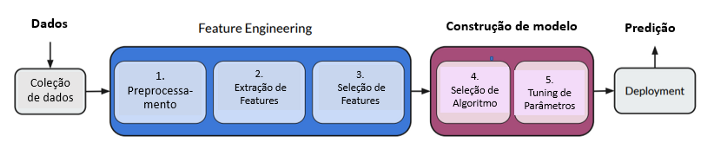